<p style="color:green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 1. Project Setup
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

pd.set_option("display.max_columns", None)

<h1 style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
  2. Load Iris Dataset
</h1>



In [2]:
iris = load_iris(as_frame=True)

df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]


In [4]:
df = iris.frame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h1 style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 3. Data Dictionary
</h1>

In [5]:
data_dictionary = pd.DataFrame({
    "column_name": df.columns,
    "data_type": df.dtypes.values,
    "non_null_count": df.notnull().sum().values,
    "null_count": df.isnull().sum().values,
    "null_pct": (df.isnull().mean() * 100).round(2).values,
    "description": [
        "Length of sepal (cm)",
        "Width of sepal (cm)",
        "Length of petal (cm)",
        "Width of petal (cm)",
        "Iris species label"
    ]
})

data_dictionary

,column_name,data_type,non_null_count,null_count,null_pct,description
0,sepal_length,float64,150,0,0.0,Length of sepal (cm)
1,sepal_width,float64,150,0,0.0,Width of sepal (cm)
2,petal_length,float64,150,0,0.0,Length of petal (cm)
3,petal_width,float64,150,0,0.0,Width of petal (cm)
4,species,int64,150,0,0.0,Iris species label


### Saving data_dictionary.csv

In [6]:
data_dictionary.to_csv("data_dictionary.csv", index=False)

<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
  4. Data Quality Assessment
</p>

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Shape & Types
</p>

In [7]:
df.shape
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Missing Values
</p>

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Duplicate Rows
</p>

In [9]:
df.duplicated().sum()

np.int64(1)

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Remove Duplicates
</p>

In [10]:
df = df.drop_duplicates()

<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
  5. Statistical Profiling
</p>

In [11]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Grouped by species
</p>

In [12]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.604082,2.979592,5.561224,2.028571


<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 6. Outlier Detection
</p>

In [13]:
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ]
    
    print(f"{col}: {outliers.shape[0]} potential outliers")

sepal_length: 0 potential outliers
sepal_width: 4 potential outliers
petal_length: 0 potential outliers
petal_width: 0 potential outliers
species: 0 potential outliers


<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 7. Feature Engineering
</p>

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Petals Area
</p>

In [14]:
df = df.drop_duplicates()

In [15]:
df["petal_area"] = df["petal_length"] * df["petal_width"]

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Sepal Area
</p>

In [16]:
df["sepal_area"] = df["sepal_length"] * df["sepal_width"]

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Size Categories
</p>

In [17]:
df["petal_size_category"] = pd.cut(
    df["petal_area"],
    bins=[0, 2, 5, 10, 20],
    labels=["small", "medium", "large", "very_large"]
)


<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 8. Validation Check
</p>

In [18]:
assert df.isnull().sum().sum() == 0
assert df.duplicated().sum() == 0

<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 9. Save Clean Dataset
</p>

In [19]:
df.to_csv("cleaned_iris_data.csv", index=False)

<p style="color: green; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 10. Lightweight EDA
</p>

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Pairplot
</p>

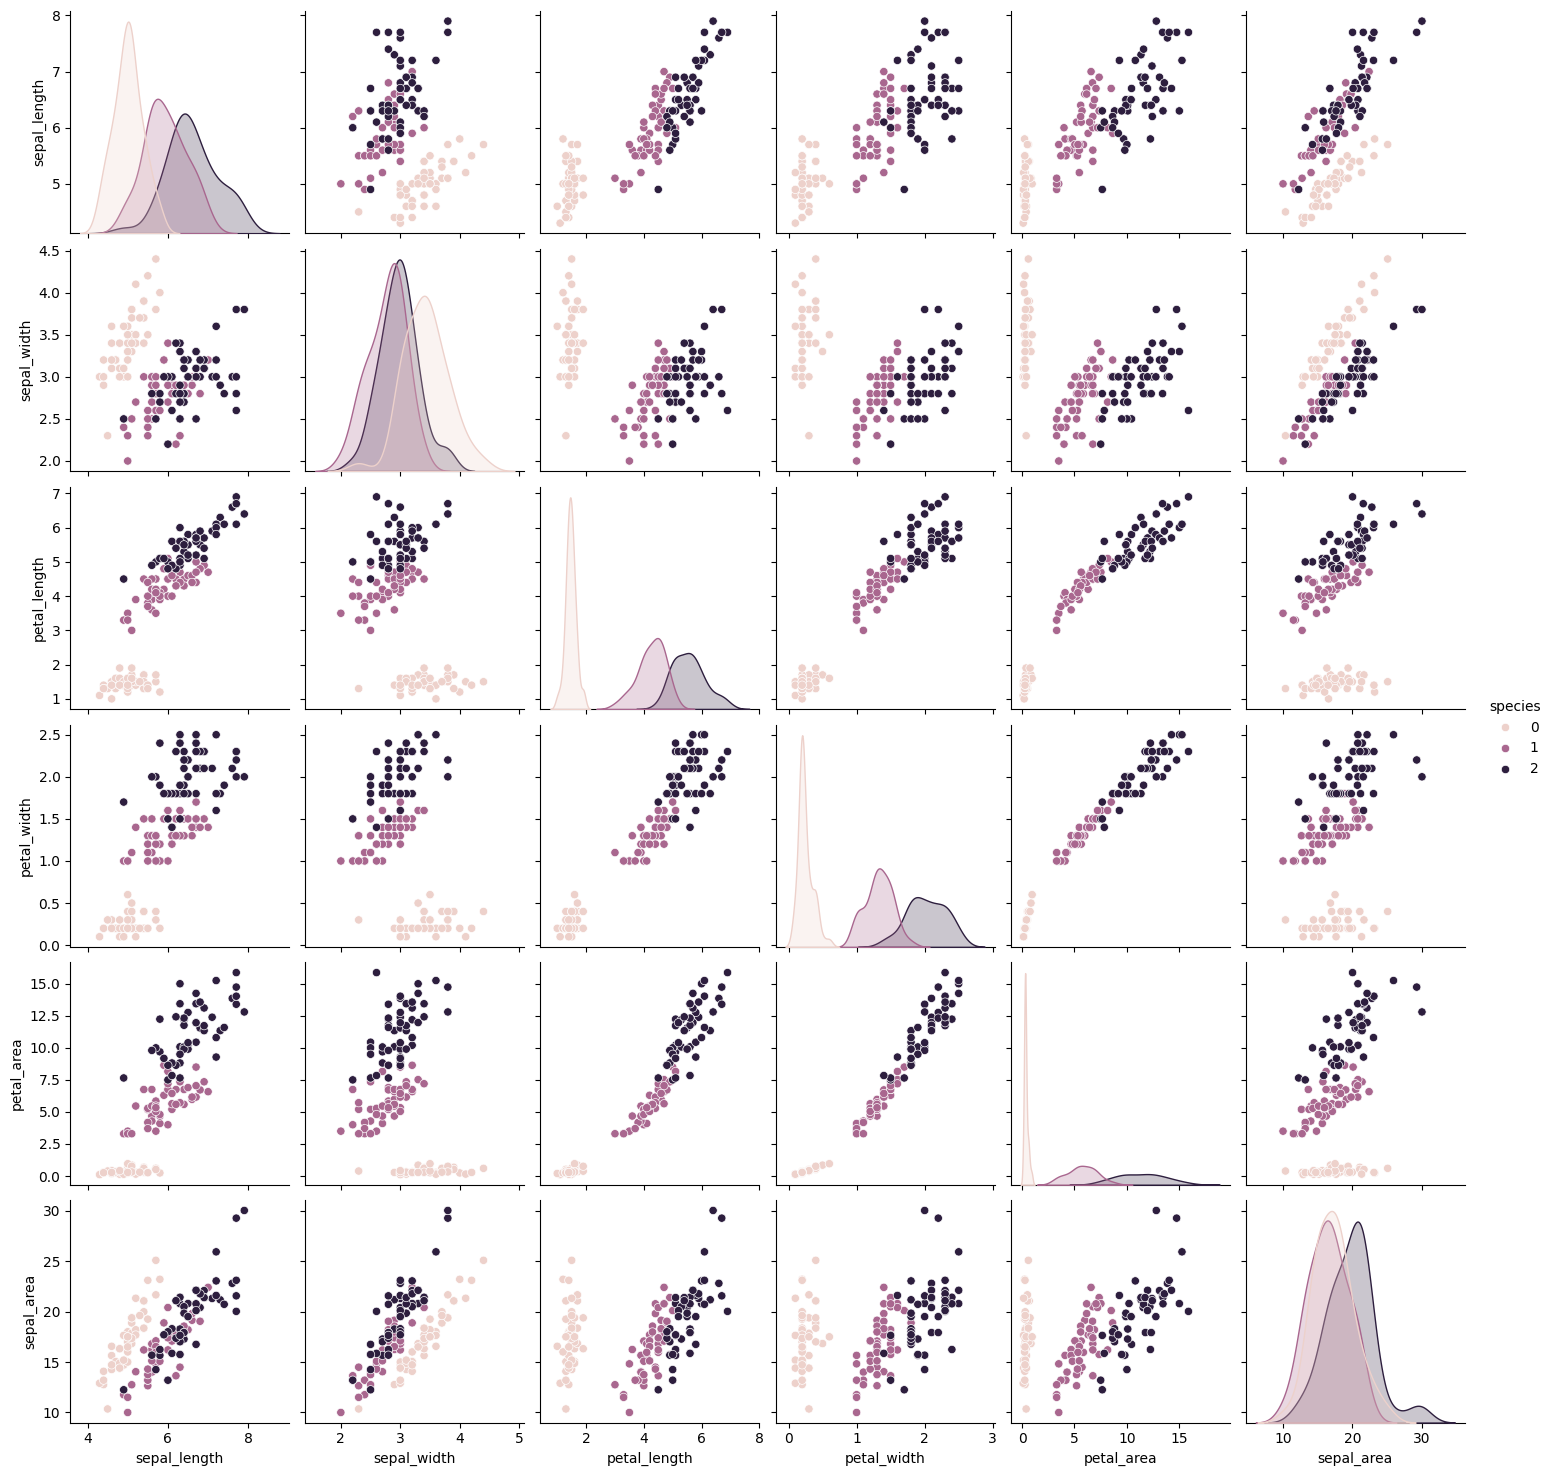

In [20]:
sns.pairplot(df, hue="species")
plt.show()

<p style="color: green; font-size: 20px; font-weight: bold; text-align: left;padding-left:50px; font-family: 'Times New Roman', Times, serif;">
  Box plot
</p>

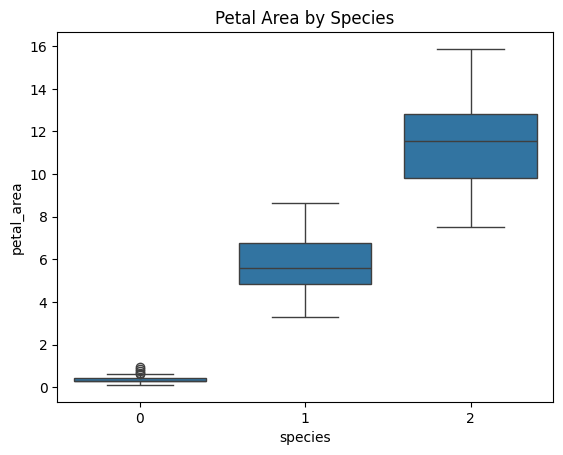

In [21]:
sns.boxplot(x="species", y="petal_area", data=df)
plt.title("Petal Area by Species")
plt.show()